# Import Libraries and Load Dataset

In [53]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('house_price.csv')

# Display first 5 rows
data.head()


,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


# EDA & Data Preprocessing 

In [19]:
data.shape

(7120, 108)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Columns: 108 entries, bath to location_Tumkur Road
dtypes: float64(5), int64(103)
memory usage: 5.9 MB


In [5]:
data.describe()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
count,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,...,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000,7120.000000
mean,2.390871,1.572759,96.454991,1479.729806,2.465169,5923.806855,0.750702,0.182303,0.061938,0.792697,...,0.003090,0.003090,0.002949,0.002949,0.002949,0.002949,0.002809,0.002809,0.002809,0.002809
std,0.876822,0.770583,116.185034,913.779769,0.841520,2556.650935,0.432637,0.386121,0.241060,0.405403,...,0.055505,0.055505,0.054232,0.054232,0.054232,0.054232,0.052929,0.052929,0.052929,0.052929
min,1.000000,0.000000,10.000000,350.000000,1.000000,1250.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,49.230000,1100.000000,2.000000,4416.761042,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,69.000000,1255.000000,2.000000,5417.855613,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,104.000000,1640.250000,3.000000,6618.285651,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,3.000000,2912.000000,30400.000000,9.000000,35000.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum().sum())

Missing Values:
 0


In [16]:
data.columns

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=108)

In [ ]:
# List of all non- numeric features
non_numeric_features = data.select_dtypes(include=['object']).columns.tolist()

Non-numeric Features:
 []


##### THe data already seems to be categorical encoded

C:\Users\sathw\AppData\Local\Temp\ipykernel_1944\872978480.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'], bins=50, color='blue')


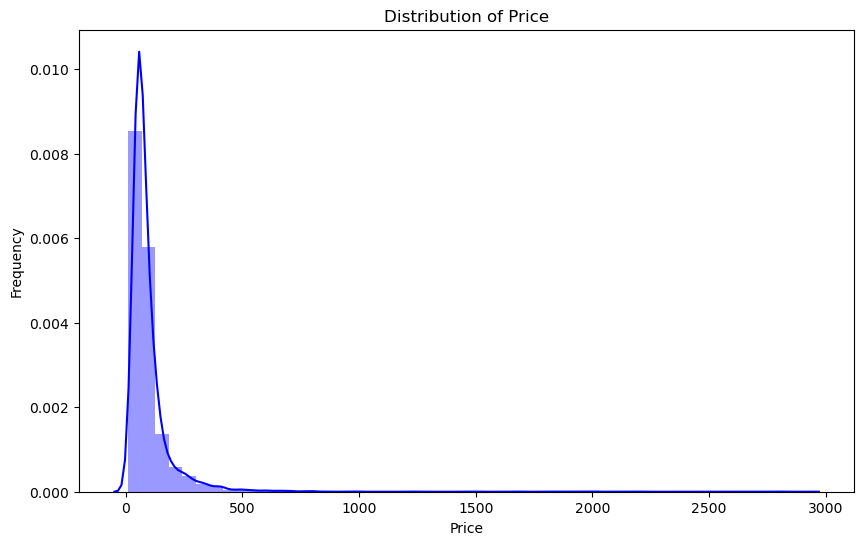

In [34]:
# Distribution of target variable
plt.figure(figsize=(10, 6)) 
sns.distplot(data['price'], bins=50, color='blue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft', 'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area', 'area_typePlot  Area', 'availability_Ready To Move']


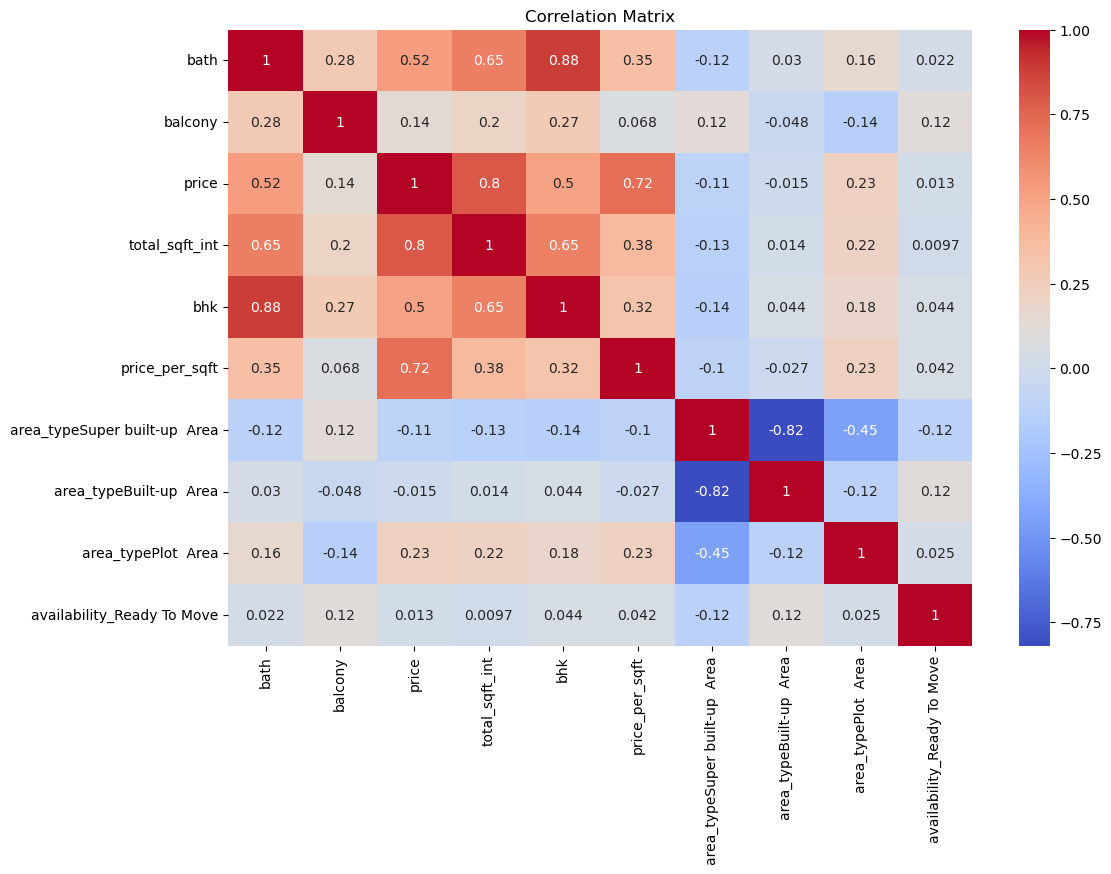

In [50]:
filtered_col = [col for col in data.columns if "location" not in col]
print(filtered_col)

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data[filtered_col].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [51]:
data[filtered_col]

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
0,3.0,2.0,150.00,1672.0,3,8971.291866,1,0,0,1
1,3.0,3.0,149.00,1750.0,3,8514.285714,0,1,0,1
2,3.0,2.0,150.00,1750.0,3,8571.428571,1,0,0,1
3,2.0,2.0,40.00,1250.0,2,3200.000000,1,0,0,1
4,2.0,2.0,83.00,1200.0,2,6916.666667,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
7115,3.0,2.0,325.00,2900.0,3,11206.896552,1,0,0,1
7116,3.0,1.0,84.83,1780.0,3,4765.730337,1,0,0,0
7117,2.0,1.0,48.00,880.0,2,5454.545455,0,0,1,1
7118,2.0,1.0,55.00,1000.0,2,5500.000000,0,0,1,0


# Split Data into Features and Target



In [52]:
# Define features (X) and target (y)
X = data.drop(columns=['price'])
y = data['price']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (5696, 107)
Testing Data Shape: (1424, 107)


In [54]:
# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

In [73]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

# Add constant for intercept term
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit the Linear Regression Model
lr_sm = sm.OLS(y_train, X_train_sm).fit()

# Predict on test data
y_pred_lr = lr_sm.predict(X_test_sm)

# Calculate Residuals
residuals = y_test - y_pred_lr


In [75]:
lr_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     282.5
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:21:44   Log-Likelihood:                -29987.
No. Observations:                5696   AIC:                         6.019e+04
Df Residuals:                    5588   BIC:                         6.091e+04
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.1055      0.626    153.546      0.000      94.879      97.333
x1             2.1070      1.427      1.476      0.140      -0.691       4.905
x2            -0.2173      0.696     -0.312      0.755      -1.581       1.146
x3            80.9618      0.852     95.059      0.000      79.292      82.632
x4           -12.4300      1.412     -8.802      0.000     -15.198      -9.662
x5            64.6517      0.812     79.622      0.000      63.060      66.244
x6             1.0388      3.786      0.274      0.784      -6.383       8.461
x7            -0.4224      3.410     -0.124      0.901      -7.108       6.263
x8            -2.6503      2.202     -1.203      0.229      -6.967       1.667
x9            -2.1964      0.701     -3.132      0.002      -3.571      -0.822
x10           -3.4954      0.654     -5.344      0.000      -4.778      -2.213
x11           -2.4196      0.642     -3.768      0.000      -3.679      -1.161
x12            0.5182      0.645      0.803      0.422      -0.746       1.782
x13           -0.9859      0.637     -1.549      0.121      -2.234       0.262
x14            2.0384      0.642      3.177      0.001       0.781       3.296
x15            0.4467      0.639      0.699      0.484      -0.805       1.699
x16           -1.5287      0.636     -2.405      0.016      -2.775      -0.282
x17           -0.2625      0.637     -0.412      0.680      -1.511       0.986
x18            2.6043      0.640      4.066      0.000       1.349       3.860
x19           -1.5129      0.637     -2.376      0.018      -2.761      -0.264
x20            2.1493      0.642      3.348      0.001       0.891       3.408
x21           -2.8621      0.643     -4.449      0.000      -4.123      -1.601
x22           -1.6625      0.633     -2.625      0.009      -2.904      -0.421
x23           -0.7958      0.634     -1.255      0.210      -2.039       0.448
x24           -0.0863      0.639     -0.135      0.893      -1.339       1.167
x25            1.0779      0.633      1.703      0.089      -0.163       2.319
x26            1.9629      0.634      3.097      0.002       0.720       3.205
x27           -5.0484      0.669     -7.541      0.000      -6.361      -3.736
x28           -0.8695      0.631     -1.379      0.168      -2.106       0.367
x29           -0.4984      0.631     -0.790      0.430      -1.736       0.739
x30            1.7602      0.634      2.778      0.005       0.518       3.002
x31           -0.3451      0.631     -0.547      0.584      -1.582       0.892
x32           -0.4540      0.631     -0.720      0.472      -1.690       0.782
x33            0.7042      0.633      1.113      0.266      -0.536       1.944
x34           -1.3468      0.630     -2.137      0.033      -2.582      -0.111
x35            0.1287      0.630      0.204      0.838      -1.107       1.364
x3

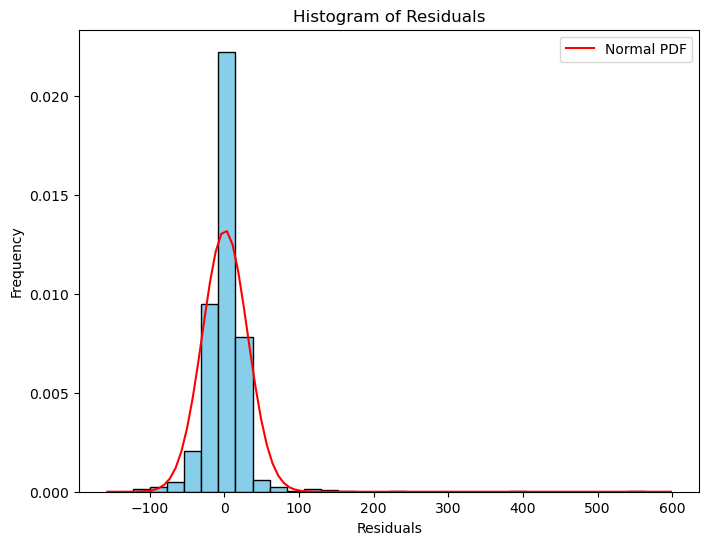

In [74]:
# Plot histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black', density=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

# Overlay Normal Distribution
mean_res = residuals.mean()
std_res = residuals.std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
plt.plot(x, stats.norm.pdf(x, mean_res, std_res), color='red', label='Normal PDF')
plt.legend()
plt.show()


## Decision Tree

In [59]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree
dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluate
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree - MSE: {mse_dt:.2f}, R²: {r2_dt:.2f}")


Decision Tree - MSE: 438.97, R²: 0.96


## Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")


Random Forest - MSE: 398.19, R²: 0.96


In [72]:
import pandas as pd

# Feature Importance for Decision Tree
dt_importances = dt.feature_importances_
rf_importances = rf.feature_importances_
features = X.columns

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Decision Tree Importance': dt_importances,
    'Random Forest Importance': rf_importances
})

# Sort by Random Forest Importance
feature_importance_df = feature_importance_df.sort_values(by='Random Forest Importance', ascending=False)

# Display the DataFrame
print(feature_importance_df)


                            Feature  Decision Tree Importance  \
2                    total_sqft_int                  0.760060   
4                    price_per_sqft                  0.237088   
3                               bhk                  0.001052   
1                           balcony                  0.000122   
31                location_Kothanur                  0.000000   
..                              ...                       ...   
97         location_Kalena Agrahara                  0.000000   
56           location_Bisuvanahalli                  0.000000   
94          location_Subramanyapura                  0.000000   
65             location_Bommasandra                  0.000000   
91  location_Kengeri Satellite Town                  0.000000   

    Random Forest Importance  
2                   0.758781  
4                   0.230546  
3                   0.004935  
1                   0.001160  
31                  0.001148  
..                       ...  
97

# PCA

In [85]:
# PCA to reduce dimensionality
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA(n_components=0.95, random_state=42)

# Fit PCA
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Original Shape:", X_train.shape)
print("Reduced Shape:", X_train_pca.shape)


Original Shape: (5696, 107)
Reduced Shape: (5696, 97)


In [86]:
# Train Decision Tree
dt_pca = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_pca.fit(X_train_pca, y_train)

# Predictions
y_pred_dt_pca = dt_pca.predict(X_test_pca)

# Evaluate
mse_dt_pca = mean_squared_error(y_test, y_pred_dt_pca)
r2_dt_pca = r2_score(y_test, y_pred_dt_pca)

print(f"Decision Tree with PCA - MSE: {mse_dt_pca:.2f}, R²: {r2_dt_pca:.2f}")

Decision Tree with PCA - MSE: 5046.40, R²: 0.56
